In [80]:
## 통계적데이터분석 데이터 분석 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats

In [64]:
data = pd.read_csv('KoreaTravel_2019.csv')

In [65]:
## 전처리 된 데이터 사용
data_set = data[["ID","stay","JEJU","KYUNG_S","KYUNG_N","JEON_S","JEON_N","CHOONG_S","CHOONG_N","GANGWON","KYUNGGI","SEJONG","ULSAN","DAEJEON","GWANGJU",
"INCHEON","DAEGU","BUSAN","SEOUL","total_cost", "accom_cost","food_cost","transp_cost","activity_cost","shopping_cost","cost_ski_watering",
                 "cost_camping","cost_hiking", "cost_fishing","cost_costume","cost_bagpack","select_reason_2",
            "Satify","revisit","recommend","BSEX_1","age","fam_num","earn_fam",'spring','summer','autumn','winter']]                       


In [66]:
data_set

,ID,stay,JEJU,KYUNG_S,KYUNG_N,JEON_S,JEON_N,CHOONG_S,CHOONG_N,GANGWON,...,revisit,recommend,BSEX_1,age,fam_num,earn_fam,spring,summer,autumn,winter
0,22020520011_1229732,1,0.0,0.0,3.0,0.0,1.0,0.0,0,0.0,...,4.0,3.0,0,4,3,8,0,1,0,0
1,11090711981_1129310,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,...,4.0,4.0,0,6,4,6,1,0,0,0
2,2503073057A_1070957,0,0.0,0.0,0.0,0.0,1.0,2.0,0,0.0,...,4.0,4.0,0,2,3,6,1,0,0,0
3,26030550451_1334180,1,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,4.0,4.0,1,5,4,5,0,0,1,0
4,11080630451_1223531,2,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,...,4.0,3.0,1,4,3,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,26310390321_1301477,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,...,NaN,NaN,0,4,4,6,0,0,1,0
10499,29010110111_1012934,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,NaN,NaN,1,7,2,6,0,0,0,1
10500,29010110111_1012999,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,0,6,3,6,0,0,0,1
10501,29010110231_1042990,2,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,...,NaN,NaN,1,3,3,4,0,0,0,1


In [67]:
seoul = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
busan = BUSAN['Satify']+BUSAN['revisit']+BUSAN['recommend']
daegu = DAEGU['Satify']+DAEGU['revisit']+DAEGU['recommend']
incheon = INCHEON['Satify']+INCHEON['revisit']+INCHEON['recommend']
gwangju = GWANGJU['Satify']+GWANGJU['revisit']+GWANGJU['recommend']
daejeon = DAEJEON['Satify']+DAEJEON['revisit']+DAEJEON['recommend']
ulsan = ULSAN['Satify']+ULSAN['revisit']+ULSAN['recommend']
sejong = SEJONG['Satify']+SEJONG['revisit']+SEJONG['recommend']
kyunggi = KYUNGGI['Satify']+KYUNGGI['revisit']+KYUNGGI['recommend']
gangwon = GANGWON['Satify']+GANGWON['revisit']+GANGWON['recommend']
choong_n = CHOONG_N['Satify']+CHOONG_N['revisit']+CHOONG_N['recommend']
choong_s = CHOONG_S['Satify']+CHOONG_S['revisit']+CHOONG_S['recommend']
jeon_n = JEON_N['Satify']+JEON_N['revisit']+JEON_N['recommend']
jeon_s = JEON_S['Satify']+JEON_S['revisit']+JEON_S['recommend']
kyung_n = KYUNG_N['Satify']+KYUNG_N['revisit']+KYUNG_N['recommend']
kyung_s = KYUNG_S['Satify']+KYUNG_S['revisit']+KYUNG_S['recommend']
jeju = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']

In [69]:
print("서울:",seoul.mean())
print("부산:",busan.mean())
print("대구:",daegu.mean())
print("인천:",incheon.mean())
print("광주:",gwangju.mean())
print("대전:",daejeon.mean())
print("울산:",ulsan.mean())
print("세종:",sejong.mean())
print("경기:",kyunggi.mean())
print("강원:",gangwon.mean())
print("충청북도:",choong_n.mean())
print("충청남도:",choong_s.mean())
print("전라북도:",jeon_n.mean())
print("전라남도:",jeon_s.mean())
print("경상남도:",kyung_n.mean())
print("경상북도:",kyung_s.mean())
print("제주:",jeju.mean())

서울: 8.510917030567686
부산: 11.225757575757576
대구: 9.01063829787234
인천: 10.151162790697674
광주: 7.901639344262295
대전: 8.443661971830986
울산: 9.972850678733032
세종: 8.978260869565217
경기: 10.12996632996633
강원: 11.84051329055912
충청북도: 9.457202505219207
충청남도: 10.670305676855895
전라북도: 11.404255319148936
전라남도: 11.39543057996485
경상남도: 10.529411764705882
경상북도: 10.704456606724003
제주: 12.206521739130435


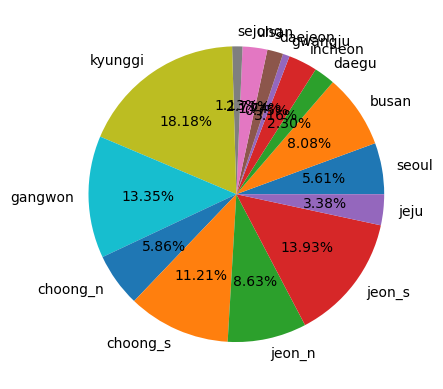

In [71]:
## 각 지역별 응답자 수를 원형 그래프로 시각화

ratio = [len(SEOUL),len(BUSAN),len(DAEGU),len(INCHEON),len(GWANGJU),len(DAEJEON),len(ULSAN),len(SEJONG),
         len(KYUNGGI),len(GANGWON),len(CHOONG_N),len(CHOONG_S),len(JEON_N),len(JEON_S),len(JEJU)]
labels = ['seoul','busan','daegu','incheon','gwangju','daejeon','ulsan','sejong','kyunggi','gangwon','choong_n',
          'choong_s','jeon_n','jeon_s','jeju']

plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.show()

In [40]:
## 선호도와 응답자 수를 기반으로 분석할 지역 결정 - 강원도 데이터

In [114]:
GANGWON
GANGWON1 = GANGWON.drop('ID', axis=1)

In [118]:
g_col_array = GANGWON1.columns.tolist()   # GANGWON1 데이터의 컬럼명 리스트

## 상관분석
for element in g_col_array:
    print(element, np.corrcoef(GANGWON1[element], gangwon)[0, 1])
    

stay 0.020198265551317283
JEJU 0.0019885647145389622
KYUNG_S 0.03513286986439187
KYUNG_N -0.028038205665286746
JEON_S 0.01714350043679225
JEON_N 0.003982613866658105
CHOONG_S 0.005987707849942162
CHOONG_N 0.01819234097351506
GANGWON nan
KYUNGGI -0.016417192618014297
SEJONG 0.020454803561895843
ULSAN 0.0019885647145389627
DAEJEON 0.023332715899934173
GWANGJU 0.0019885647145389622
INCHEON 0.010159220790099741
DAEGU -0.01230431910151339
BUSAN 0.02529006341153021
SEOUL 0.024759516080651352
total_cost 0.23393212290141546
accom_cost 0.15076131591883696
food_cost 0.21138888224794924
transp_cost 0.2093763805922878
activity_cost 0.09988594622752707
shopping_cost 0.09230176285911545
cost_ski_watering 0.016573113449898026
cost_camping 0.002323354158893543
cost_hiking 0.00850106753606404
cost_fishing 0.009515244048208684
cost_costume 0.05112085806738138
cost_bagpack 0.03168184030909276
select_reason_2 0.18521160936391157
Satify 0.9485875089115062
revisit 0.9554116417832504
recommend 0.949902158938

C:\Users\LG\AppData\Local\Temp\ipykernel_24216\1871895715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GANGWON1['tot_preference'])


<AxesSubplot:xlabel='tot_preference', ylabel='Density'>

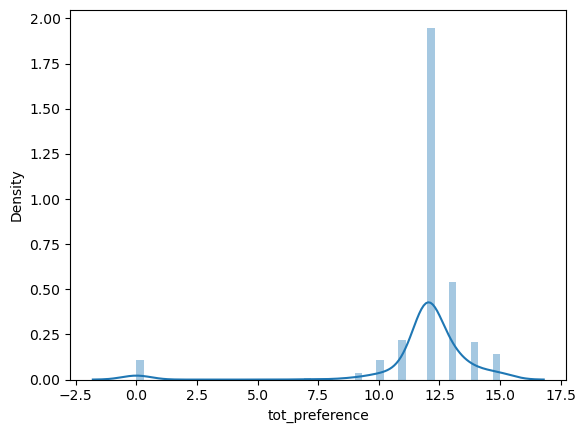

In [136]:
sns.distplot(GANGWON1['tot_preference'])

In [137]:
g_col_array = GANGWON1.columns.tolist()   # 컬럼명 리스트

## One way ANOVA
for element in g_col_array:
    print(element, f_oneway(GANGWON1[element], gangwon))
    

stay F_onewayResult(statistic=19469.314094659654, pvalue=0.0)
JEJU F_onewayResult(statistic=25887.486656645615, pvalue=0.0)
KYUNG_S F_onewayResult(statistic=25839.488182695364, pvalue=0.0)
KYUNG_N F_onewayResult(statistic=25783.793186735034, pvalue=0.0)
JEON_S F_onewayResult(statistic=25831.52644905385, pvalue=0.0)
JEON_N F_onewayResult(statistic=25863.468824971846, pvalue=0.0)
CHOONG_S F_onewayResult(statistic=25823.641599472798, pvalue=0.0)
CHOONG_N F_onewayResult(statistic=25815.706425356846, pvalue=0.0)
GANGWON F_onewayResult(statistic=21706.167541033577, pvalue=0.0)
KYUNGGI F_onewayResult(statistic=25408.076710502428, pvalue=0.0)
SEJONG F_onewayResult(statistic=25879.47056121091, pvalue=0.0)
ULSAN F_onewayResult(statistic=25887.486656645615, pvalue=0.0)
DAEJEON F_onewayResult(statistic=25831.58684869758, pvalue=0.0)
GWANGJU F_onewayResult(statistic=25871.43626013563, pvalue=0.0)
INCHEON F_onewayResult(statistic=25823.641599472798, pvalue=0.0)
DAEGU F_onewayResult(statistic=25855.4